In [1]:
%matplotlib inline

In [2]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from scipy.misc import imread
import matplotlib.patches as patches
from torch.utils.data import DataLoader

In [3]:
dataDir = './data/mscoco'
dataType = 'train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
coco=COCO(annFile)


loading annotations into memory...
Done (t=13.08s)
creating index...
index created!


In [4]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print 'COCO categories: \n\n', ' '.join(nms)

nms = set([cat['supercategory'] for cat in cats])
print 'COCO supercategories: \n', ' '.join(nms)

COCO categories: 

person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


In [5]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [6]:
id2cocoid = { id :coco_id for id, coco_id in enumerate(coco.getImgIds())}

cocoid2id = dict((v,k) for k,v in id2cocoid.iteritems())
cocoid2id
coco.loadImgs(393221)[0]

{u'coco_url': u'http://mscoco.org/images/393221',
 u'date_captured': u'2013-11-16 12:47:32',
 u'file_name': u'COCO_train2014_000000393221.jpg',
 u'flickr_url': u'http://farm6.staticflickr.com/5340/8991584979_5ab5055a94_z.jpg',
 u'height': 640,
 u'id': 393221,
 u'license': 3,
 u'width': 427}

{u'segmentation': [[138.84, 317.78, 145.74, 322.09, 148.32, 333.3, 153.5, 336.75, 168.16, 327.26, 169.88, 320.36, 177.64, 326.4, 176.78, 334.16, 168.16, 336.75, 165.57, 338.47, 162.12, 369.52, 166.43, 369.52, 168.16, 348.82, 171.61, 344.51, 170.74, 350.54, 175.92, 364.34, 175.92, 372.1, 181.09, 371.24, 178.51, 357.44, 177.64, 343.65, 181.96, 338.47, 192.3, 335.88, 195.75, 328.12, 202.65, 331.57, 200.93, 335.02, 202.65, 346.23, 206.96, 360.89, 206.96, 366.93, 197.48, 366.93, 193.17, 370.38, 206.96, 370.38, 204.38, 385.04, 214.72, 385.04, 210.41, 375.55, 215.59, 360.03, 223.35, 341.92, 231.97, 330.71, 240.6, 316.05, 250.08, 304.84, 264.74, 306.56, 271.64, 305.7, 266.47, 299.67, 262.15, 291.9, 253.53, 287.59, 240.6, 286.73, 233.7, 287.59, 231.11, 292.77, 225.94, 292.77, 222.49, 295.35, 202.65, 295.35, 193.17, 293.63, 182.82, 292.77, 176.78, 294.49, 169.02, 301.39, 167.3, 304.84, 165.57, 311.74, 164.71, 316.91, 163.85, 322.95, 157.81, 328.99, 153.5, 330.71, 149.19, 317.78, 144.01, 316.05, 

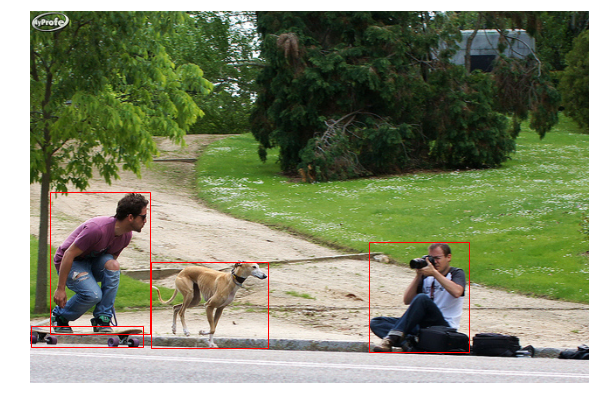

In [8]:
width = img['width']
height = img['height']

I = imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

valid_objs = []
for obj in anns:
    x1 = np.max((0, obj['bbox'][0]))
    y1 = np.max((0, obj['bbox'][1]))
    x2 = np.min((width - 1, x1 + np.max((0, obj['bbox'][2] - 1))))
    y2 = np.min((height - 1, y1 + np.max((0, obj['bbox'][3] - 1))))
    if obj['area'] > 0 and x2 >= x1 and y2 >= y1:
        obj['clean_bbox'] = [x1, y1, x2, y2]
        valid_objs.append(obj)
objs = valid_objs
num_objs = len(objs)
ax = plt.gca()

for obj in objs:
    print obj
    bbox = obj['bbox']
    x,y ,w,h = bbox
    rect = patches.Rectangle((x,y),w,h,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()


In [14]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
import os

dataDir = './data/mscoco'
dataType = 'images/train2014'
images_dir = os.path.join(dataDir, dataType)
cap = dset.CocoDetection(root = images_dir,
                        annFile = annFile,
                        transform=transforms.ToTensor())

loading annotations into memory...
Done (t=19.58s)
creating index...
index created!


In [50]:
img, target = cap[9]

In [51]:
import copy
def tar(target):
    for tar in target:
        tmp = copy.copy(tar['bbox'])
        tmp.append(tar['category_id'])
        
        yield tmp


In [54]:
a = (i for i in tar(target))

In [56]:
import numpy as np
np.vstack(a)

array([[ 220.99,  263.96,  143.49,  210.95,    1.  ],
       [ 206.53,  516.1 ,   75.69,   74.69,   35.  ],
       [ 267.35,  268.44,   79.89,   56.31,   27.  ]])

In [ ]:
from faster_rcnn.utils.dataset import CocoData
cap = CocoData(root = images_dir,
                        annFile = annFile,
                        transform=transforms.ToTensor())


loading annotations into memory...
